# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

List only the BITS (Name) of active contributors in this assignment:
1. ___________________
2. __________________
3. ____________________
4. ___________________
5. ___________________

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [ ]:
#Code Block : Set Initial State (Must handle dynamic inputs)

In [ ]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

In [1]:
class Graph:

    def __init__(self, ):
        self.start_node = None
        self.end_node = None
        self.graph_matrix = []
        self.nodes_registry = {}
        self.nodes_id_registry = {}
        self.paths = []
        self.node_counter = 0
        self.cost_registry = {}
        self.MAX_CHAR_LEN = 0
    
    
    # Pretty print the graph_matrix
    def print_matrix(self, ):
        for row_index, row in enumerate(self.graph_matrix):
            # If First Row, then print the column node name before the matrix
            if row_index == 0:
                column_headers = ['/',]
                column_headers.extend(list(self.nodes_registry.keys()))
                for cell in column_headers:
                    self.cell_print(cell, end='')
                print('\n')
            for col_index, col in enumerate(row):
                # If First Column, then print the row node name beofre the matrix
                if col_index == 0:
                    self.cell_print(f'{list(self.nodes_registry.keys())[row_index]}', end='')
                if self.graph_matrix[row_index][col_index] is None:
                    #print(f' {nodes_encoding[row_index][col_index][0] * nodes_encoding[row_index][col_index][1]} ')
                    self.cell_print('-', end='')
                else:
                    self.cell_print(f'{self.graph_matrix[row_index][col_index]}', end='')
            print('\n')

    # We keep a function which calculates the maximum character length of any float value or node name
    # This is necessary because when we print our matrix, we want it to appear 'good-looking'
    # In terms of character padding
    def update_max_charlen(self, input_value):
        # Convert this value to string
        input_value = str(input_value)
        self.MAX_CHAR_LEN = max(self.MAX_CHAR_LEN, len(input_value))

    def cell_print(self, input_value, end=''):

        pad_factor = self.MAX_CHAR_LEN - len(str(input_value))
        pad_before = ' '*(int(pad_factor/2))

        pad_after = ' '*(pad_factor - int(pad_factor/2))
        #print('CELL: ', input_value, ' LEN INPUT: ', len(str(input_value)), ' Max Len: ', self.MAX_CHAR_LEN)
        print(f'|{pad_before}{str(input_value)}{pad_after}', end=end)

    def register_node(self, node_name):
        if self.nodes_registry.get(node_name, False) != False:
            # Do Nothing as the node is present
            pass
        else:
            self.node_counter+=1
            self.nodes_registry[node_name] = self.node_counter
            self.nodes_id_registry[self.node_counter] = node_name

        self.update_max_charlen(node_name)

    
    # Example Input of the Function: 
    # A, B, 5, 64
    # Node1, Node2, Time, Speed
    def register_input_cost(self, user_input_string):
        params_list = [x.strip() for x in user_input_string.split(',') if x]
        # Register nodes to keep track of unique nodes,
        # This will be helpful while generating the 2D Matrix
        self.register_node(params_list[0])
        self.register_node(params_list[1])
        
        # Register the cost
        # Example: if from Node1 to Node2, cost is 25, then register as:
        # cost_registry = {'Node1|Node2': 25, 'NodeN|NodeK':99, ...}
        self.cost_registry[f'{params_list[0]}|{params_list[1]}'] = float(params_list[2])*float(params_list[3])
        
        # Because of undirected graph, register nodes and cost in Mirrored Format
        # Example: if cost from 1 to 3 is 10, then cost from 3 to 1 is also 10
        self.cost_registry[f'{params_list[1]}|{params_list[0]}'] = float(params_list[2])*float(params_list[3])
        
                      
    def convert_to_2D_graph(self, ):
        # Create a graph of None
        # This creates an nxn matrix where n is the number of unique nodes
        blank_row = [None]*len(self.nodes_registry.items())
        graph = [blank_row.copy() for i in range(len(blank_row))]
        
        for key, path_cost in self.cost_registry.items():
            node_1, node_2 = key.split('|')        
            graph[self.nodes_registry[node_1]-1][self.nodes_registry[node_2]-1] = path_cost
    
        self.graph_matrix = graph
    
    
    def register_start_end_node(self, user_input_string):
        self.start_node, self.end_node = [x.strip() for x in user_input_string.split(',')]



In [2]:
# Test Case for Assignment Problem
graph = Graph()
graph.register_input_cost('New Delhi, A, 5, 64')
graph.register_input_cost('A, E, 1, 110')
graph.register_input_cost('New Delhi, Chennai, 10, 85')
graph.register_input_cost('New Delhi, B, 2, 60')
graph.register_input_cost('B, Chennai, 3, 62')
graph.register_input_cost('New Delhi, C, 7, 82')
graph.register_input_cost('C, D, 5, 45')
graph.register_input_cost('D, Chennai, 6, 32')


graph.register_start_end_node('New Delhi, Chennai')

# Convert Costs Recorded into a 2D representaton of graph
graph.convert_to_2D_graph()
graph.print_matrix()

|    /    |New Delhi|    A    |    E    | Chennai |    B    |    C    |    D    

|New Delhi|    -    |  320.0  |    -    |  850.0  |  120.0  |  574.0  |    -    

|    A    |  320.0  |    -    |  110.0  |    -    |    -    |    -    |    -    

|    E    |    -    |  110.0  |    -    |    -    |    -    |    -    |    -    

| Chennai |  850.0  |    -    |    -    |    -    |  186.0  |    -    |  192.0  

|    B    |  120.0  |    -    |    -    |  186.0  |    -    |    -    |    -    

|    C    |  574.0  |    -    |    -    |    -    |    -    |    -    |  225.0  

|    D    |    -    |    -    |    -    |  192.0  |    -    |  225.0  |    -    



In [3]:
# Take Input of the graph here

# There are threee states:
# STAGE 1 (default). Define Input costs State. Example Input: A, B, 5, 64
# STAGE 2. Define Start Node, End Node State. Example Input: A, B
# 3. End Input State. Example Input: '-E-'
# 4. Switch Input State. Example Input: '-S-'

graph = Graph()

input_states = ['define_input_costs', 'define_start_end_node']
INPUT_STATES_COUNT = len(input_states)

# Always start with input stage = 0
input_stage = 0

costs = []

while input_stage < INPUT_STATES_COUNT:
    user_input = input('Input: ')
    # End From taking Any Further Inputs
    if user_input == '-E-':
        break
    # Switch Input State
    elif user_input == '-S-':
        input_stage +=1
        if input_stage >= INPUT_STATES_COUNT:
            break
        else:
            continue
    # It means we need to start defining input costs
    if input_states[input_stage] == 'define_input_costs':
        graph.register_input_cost(user_input)
    elif input_states[input_stage] == 'define_start_end_node':
        graph.register_start_end_node(user_input)
        # Auto increment the stage
        input_stage +=1

Input: s


IndexError: list index out of range

In [4]:
class AStar(Graph):

    
    def __init__(self, ):
        super().__init__()
        self.total_path_cost = {}
        self.total_unique_paths = {}
        self.heuristic_values = {}
        
    def dfs(self, node, visited_nodes, initial_node, total_cost):
        if node == self.end_node:
            if self.total_unique_paths.get(initial_node, False) == False:
                self.total_unique_paths[initial_node] = 1
            else:
                self.total_unique_paths[initial_node] += 1
            
            if self.total_path_cost.get(initial_node, False) == False:
                self.total_path_cost[initial_node] = total_cost
            else:
                self.total_path_cost[initial_node] += total_cost
            # print('Terminated Traversal at: ', node, ' Visited: ', visited_nodes, ' Initial: ', initial_node, ' Total Cost So far: ', total_cost)
            
        else:
            visited_nodes[node] = True
            for col_index in range(len(self.graph_matrix[self.nodes_registry[node]-1])):
                # The node should not be visited and a valid travel cost must be present
                # If the travel cost is not none, that means we can travel with some incurred cost
                if visited_nodes.get(self.nodes_id_registry[col_index+1], False) == False\
                and not self.graph_matrix[self.nodes_registry[node]-1][col_index] is None:
                    # print(' Currently at: ', node, ' Traversing to: ', self.nodes_id_registry[col_index+1])
                    self.dfs(self.nodes_id_registry[col_index+1], visited_nodes, initial_node, total_cost+self.graph_matrix[self.nodes_registry[node]-1][col_index])
    
    def perform_goal_test(self, pool_of_nodes):
        for node in pool_of_nodes:
            if node['node_name'] == self.end_node:
                return node
        return None
        
    def find_min_from_pool(self, pool_of_nodes):
        minimum_cost_node = None 
        for node in pool_of_nodes:
            if minimum_cost_node is None:
                minimum_cost_node = node
            elif node['total_cost_till_goal'] < minimum_cost_node['total_cost_till_goal']:
                minimum_cost_node = node
        return minimum_cost_node
            
    def perform_heuristic_calculation(self, ):
        # For all nodes except goal node, start traversing in all directions
        for node, node_index in graph.nodes_registry.items():
            if (node == self.end_node):# or (node == self.start_node):
                pass
            else:
                self.dfs(node, {}, node, 0)
        
        for node in graph.nodes_registry.keys():
            if (node == self.end_node) or (node == self.start_node):
                self.heuristic_values[node] = 0
            else:
                self.heuristic_values[node] = self.total_path_cost[node]/self.total_unique_paths[node] 
    
    def delete_node_from_pool(self, pool_of_nodes, node):
        try:
            pool_of_nodes.remove(node)
            return True
        except ValueError as e:
            return False
        
    def get_neighbouring_nodes_and_cost(self, current_node):
        neighbour_pool = []
        # For All the neighbouring nodes of the current node
        for col_index in range(len(self.graph_matrix[self.nodes_registry[current_node['node_name']]-1])):
            # If there exits a Valid Path
            if not self.graph_matrix[self.nodes_registry[current_node['node_name']]-1][col_index] is None:
                
                neighbouring_node_name = self.nodes_id_registry[col_index+1]
                actual_cost_till_neighbour_node = current_node['actual_cost_till_node'] + self.graph_matrix[self.nodes_registry[current_node['node_name']]-1][col_index]
                estimated_cost_till_goal_node = actual_cost_till_neighbour_node + self.heuristic_values[neighbouring_node_name]
                
                path = current_node['path'].copy()
                path.append(neighbouring_node_name)
                
                neighbour_pool.append(
                    {'node_name': neighbouring_node_name, 'actual_cost_till_node': actual_cost_till_neighbour_node, 'total_cost_till_goal': estimated_cost_till_goal_node, 'path': path})
        return neighbour_pool
    
    def perform_a_star_calculation(self, ):
        
        # Start with the starting node only
        nodes_pool = [{'node_name': self.start_node, 'actual_cost_till_node': 0, 'total_cost_till_goal': 0, 'path':[self.start_node, ]}]
        
        # Try to check if any of nodes is Goal Node
        # Ideally this will be true only if start_node = end_node
        goal_test = self.perform_goal_test(nodes_pool)
        
        while len(nodes_pool) and not goal_test:
            minimum_node = self.find_min_from_pool(nodes_pool)
            if not minimum_node is None:
                nodes_pool.extend(self.get_neighbouring_nodes_and_cost(minimum_node))
            self.delete_node_from_pool(nodes_pool, minimum_node)
            print(nodes_pool)
            
            goal_test = self.perform_goal_test(nodes_pool)
            if goal_test:
                print('Goal Reached: ', goal_test)
        
        print('Fianl Goal Reached: ', goal_test)

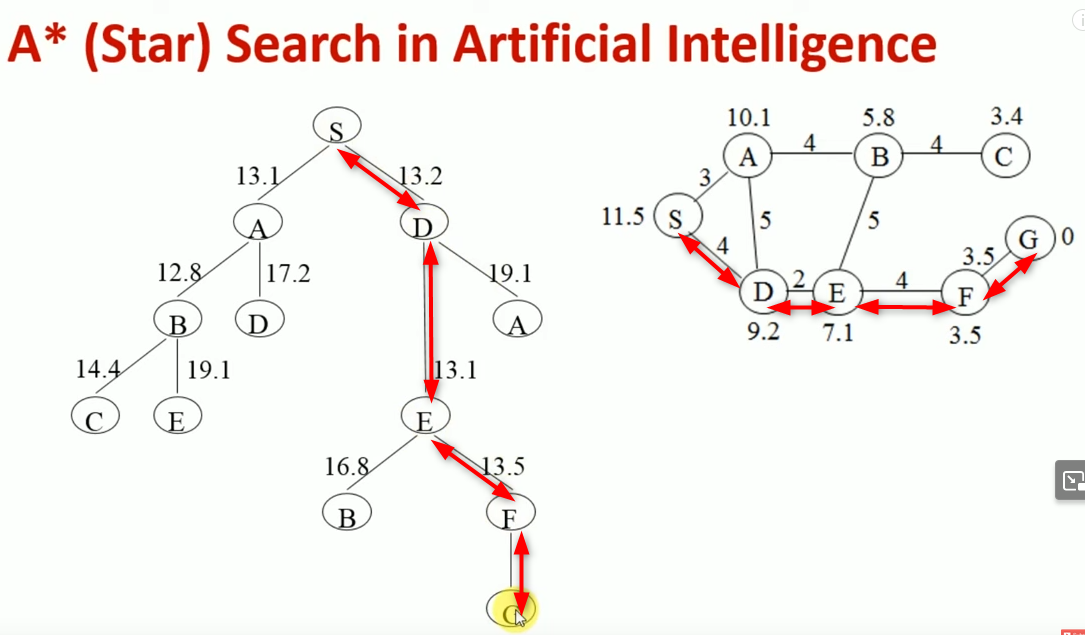

In [13]:
# Test Case for Assignment Problem
graph = AStar()
graph.register_input_cost('New Delhi, A, 5, 64')
graph.register_input_cost('A, E, 1, 110')
graph.register_input_cost('New Delhi, Chennai, 10, 85')
graph.register_input_cost('New Delhi, B, 2, 60')
graph.register_input_cost('B, Chennai, 3, 62')
graph.register_input_cost('New Delhi, C, 7, 82')
graph.register_input_cost('C, D, 5, 45')
graph.register_input_cost('D, Chennai, 6, 32')
graph.register_input_cost('E, Chennai, 4, 55')

graph.register_start_end_node('New Delhi, Chennai')

# Convert Costs Recorded into a 2D representaton of graph
graph.convert_to_2D_graph()
graph.print_matrix()

|    /    |New Delhi|    A    |    E    | Chennai |    B    |    C    |    D    

|New Delhi|    -    |  320.0  |    -    |  850.0  |  120.0  |  574.0  |    -    

|    A    |  320.0  |    -    |  110.0  |    -    |    -    |    -    |    -    

|    E    |    -    |  110.0  |    -    |  220.0  |    -    |    -    |    -    

| Chennai |  850.0  |    -    |  220.0  |    -    |  186.0  |    -    |  192.0  

|    B    |  120.0  |    -    |    -    |  186.0  |    -    |    -    |    -    

|    C    |  574.0  |    -    |    -    |    -    |    -    |    -    |  225.0  

|    D    |    -    |    -    |    -    |  192.0  |    -    |  225.0  |    -    



In [14]:
graph.perform_heuristic_calculation()
graph.perform_a_star_calculation()

[{'node_name': 'A', 'actual_cost_till_node': 320.0, 'total_cost_till_goal': 1179.25, 'path': ['New Delhi', 'A']}, {'node_name': 'Chennai', 'actual_cost_till_node': 850.0, 'total_cost_till_goal': 850.0, 'path': ['New Delhi', 'Chennai']}, {'node_name': 'B', 'actual_cost_till_node': 120.0, 'total_cost_till_goal': 879.25, 'path': ['New Delhi', 'B']}, {'node_name': 'C', 'actual_cost_till_node': 574.0, 'total_cost_till_goal': 1560.25, 'path': ['New Delhi', 'C']}]
Goal Reached:  {'node_name': 'Chennai', 'actual_cost_till_node': 850.0, 'total_cost_till_goal': 850.0, 'path': ['New Delhi', 'Chennai']}
Fianl Goal Reached:  {'node_name': 'Chennai', 'actual_cost_till_node': 850.0, 'total_cost_till_goal': 850.0, 'path': ['New Delhi', 'Chennai']}


## Rough Work of Code

In [17]:
'''
Calculate AStar()
- Get the pool
- Select the lowest cost node in the pool
- Delete the node from the pool
- And Call the Expand Neighbours function with the node
- 
Expand Neighbors and their costs (actual_cost_til_now, current_node)
- Get All Neighbours
    - (Neighbour 1, actual_cost_till_here + actual_path_cost_till_neighbour + heuristic_of_neighbour, actual_path_cost_till_neighbour)
    - (Neighbour 2, actual_cost_till_here + actual_path_cost_till_neighbour + heuristic_of_neighbour, actual_path_cost_till_neighbour)
    - (Neighbour 3, actual_cost_till_here + actual_path_cost_till_neighbour + heuristic_of_neighbour, actual_path_cost_till_neighbour)
    ...
- Return These Nodes
'''

graph.nodes_registry
graph.nodes_id_registry
graph.total_path_cost
graph.total_unique_paths
graph.heuristic_values
graph.graph_matrix
print('-')

-


In [ ]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented

In [ ]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented

### 2.	Definition of Algorithm 1 (Mention the Name of the algorithm here)

In [ ]:
#Code Block : Function for algorithm 1 implementation

### 3.	Definition of Algorithm 2 (Mention the Name of the algorithm here)

In [ ]:
#Code Block : Function for algorithm 2 implementation

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [ ]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

### 5.	Comparitive Analysis

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : _______________________________________________

________________________________________________________

_________________________________________________________